In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics
import glob
import time

import analysis_pkg
%load_ext autoreload
%autoreload 2

In [3]:
#Output: grouped df with seperate analysis for each year
yearly_sex_sep, yearly_sex_full, yearly_cat_full, yearly_group_df = analysis_pkg.yearly_multibase_analysis(2008, 2018)

#Example: analysis on grouped set of years
#group_sex_sep, group_sex_full, group_cat_full = analysis_pkg.multiyear_multibase_analysis(2014, 2018)

#Example: single year analysis
#year_sex_sep, year_sex_full, year_cat_full = analysis_pkg.singleyear_multibase_analysis(2018)

Completed Year: 2008  (1.65 min)
Completed Year: 2009  (1.78 min)
Completed Year: 2010  (1.96 min)
Completed Year: 2011  (1.71 min)
Completed Year: 2012  (1.76 min)
Completed Year: 2013  (2.04 min)
Completed Year: 2014  (2.1 min)
Completed Year: 2015  (1.9 min)
Completed Year: 2016  (2.19 min)
Completed Year: 2017  (2.02 min)
Completed Year: 2018  (2.33 min)


In [12]:
yearly_sex_sep.to_csv('data\output\yearly_sex_sep.csv')
yearly_sex_full.to_csv('data\output\yearly_sex_full.csv')
yearly_cat_full.to_csv('data\output\yearly_cat_full.csv')
yearly_group_df.to_csv('data\output\yearly_group_df.csv')

In [2]:
yearly_sex_sep = pd.read_csv('data_output\yearly_sex_sep.csv')
yearly_sex_full = pd.read_csv('data_output\yearly_sex_full.csv')
yearly_cat_full = pd.read_csv('data_output\yearly_cat_full.csv')
yearly_group_df = pd.read_csv('data_output\yearly_group_df.csv')

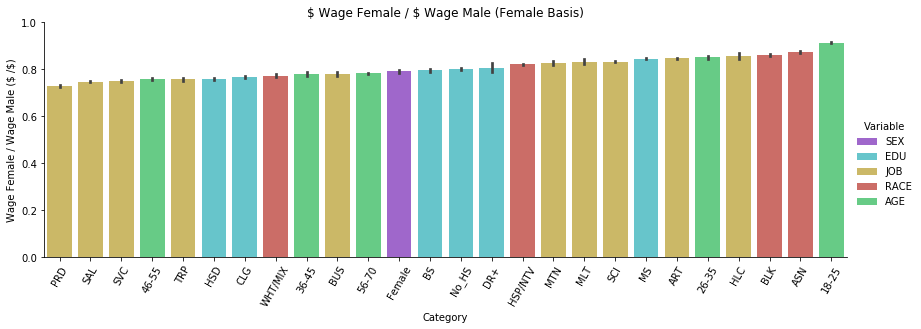

In [3]:
analysis_pkg.plot_ratio_ordered(yearly_sex_full)

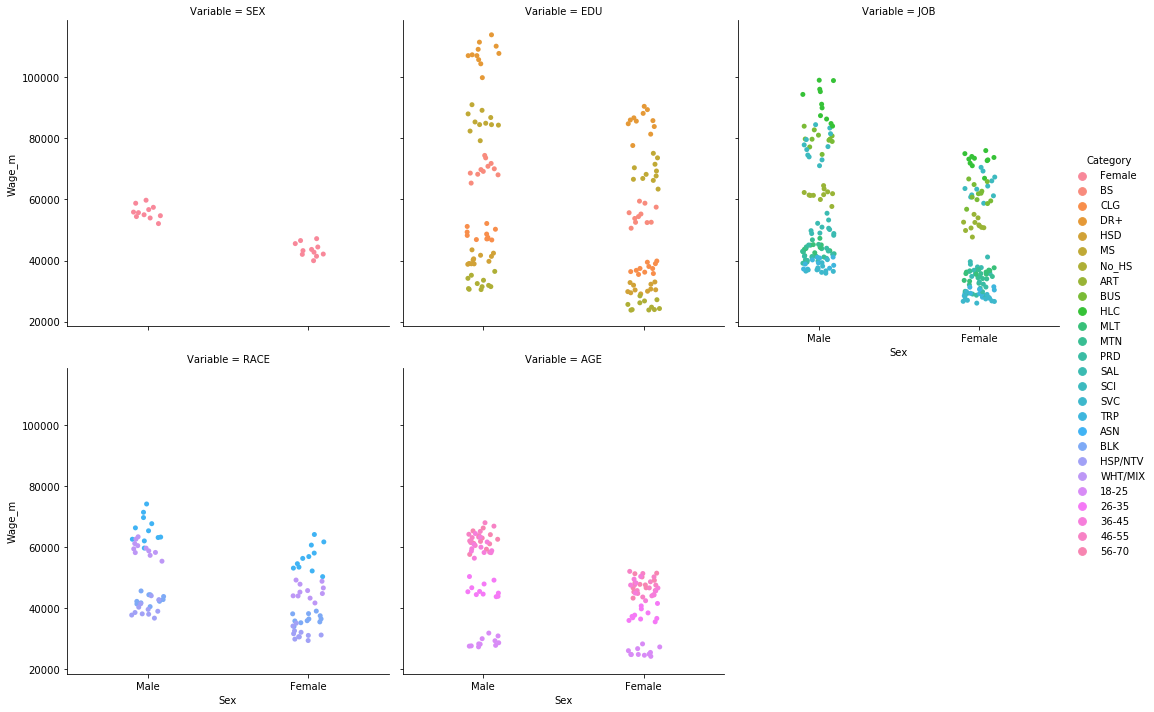

In [4]:
sns.catplot(y='Wage_m', x='Sex', hue='Category', col='Variable', col_wrap=3, data=yearly_sex_sep)

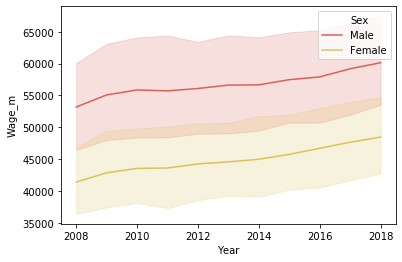

In [5]:
sns.lineplot(x='Year', y='Wage_m', hue='Sex', data=yearly_sex_sep)

In [3]:
plot_heatmap_lineplot(cat_full, yearly_sex_full, 'JOB')

NameError: name 'plot_heatmap_lineplot' is not defined

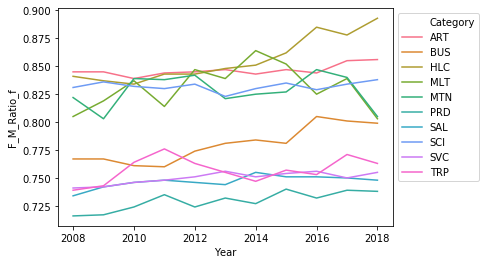

In [31]:
aa_ratio_yearly = yearly_sex_full.loc[(yearly_sex_full.Variable == 'JOB')]
sns.lineplot(x='Year', y='F_M_Ratio_f', hue='Category', data=aa_ratio_yearly)
plt.legend(bbox_to_anchor=(1, 1))

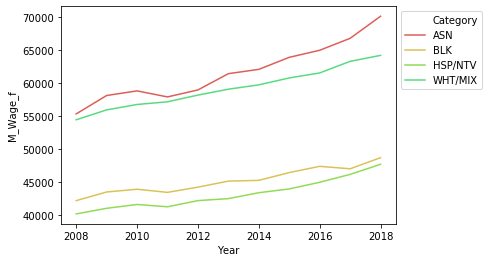

In [32]:
aa_ratio_yearly = yearly_sex_full.loc[(yearly_sex_full.Variable == 'RACE')]
sns.lineplot(x='Year', y='M_Wage_f', hue='Category', data=aa_ratio_yearly)
plt.legend(bbox_to_anchor=(1, 1))

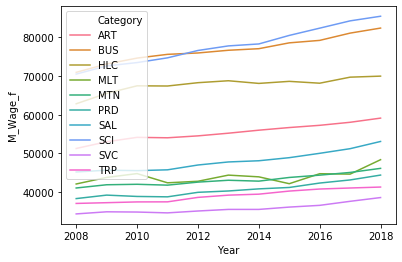

In [8]:
aa_ratio_yearly = yearly_sex_full.loc[(yearly_sex_full.Variable == 'JOB')]
sns.lineplot(x='Year', y='M_Wage_f', hue='Category', data=aa_ratio_yearly)
plt.legend(bbox_to_anchor=(1, 1))

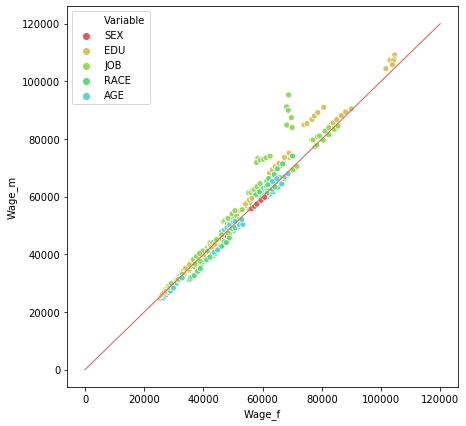

In [35]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Wage_f", y="Wage_m", hue="Variable",data=yearly_sex_sep)
plt.plot([0,120000], [0,120000], linewidth=1)

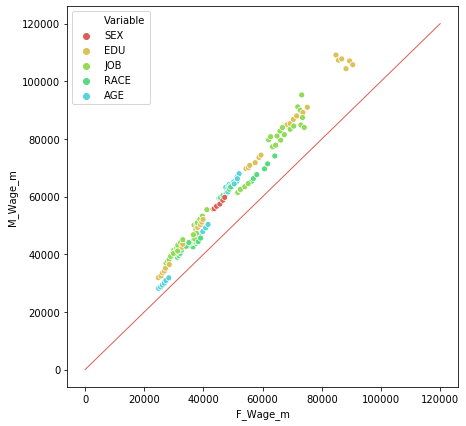

In [36]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="F_Wage_m", y="M_Wage_m", hue="Variable",data=yearly_sex_full)
plt.plot([0,120000], [0,120000], linewidth=1)

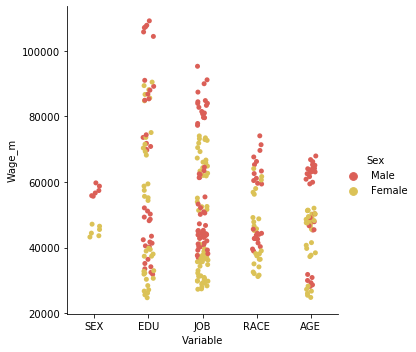

In [37]:
g = sns.catplot(x="Variable", y="Wage_m", hue="Sex",
                data=yearly_sex_sep)

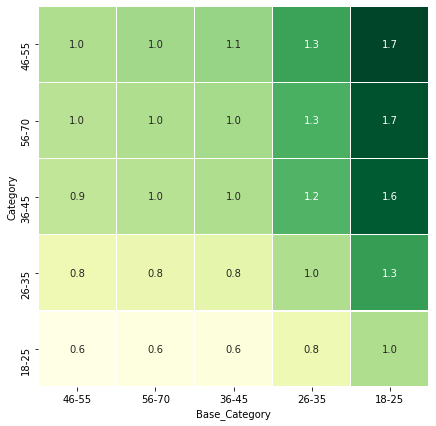

In [9]:
analysis_pkg.plot_heatmap_basecat(yearly_cat_full, 'AGE')

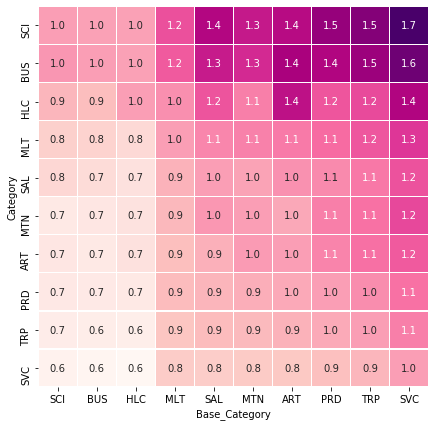

In [10]:
analysis_pkg.plot_heatmap_basecat(yearly_cat_full, 'JOB')

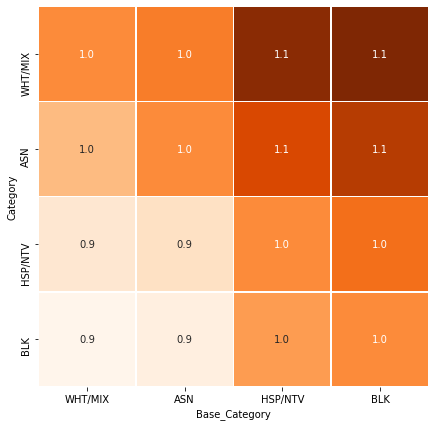

In [11]:
analysis_pkg.plot_heatmap_basecat(yearly_cat_full, 'RACE')

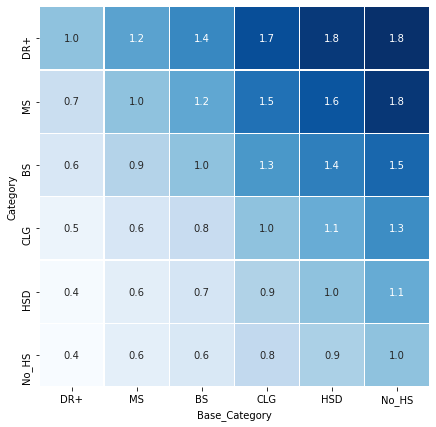

In [12]:
analysis_pkg.plot_heatmap_basecat(yearly_cat_full, 'EDU')

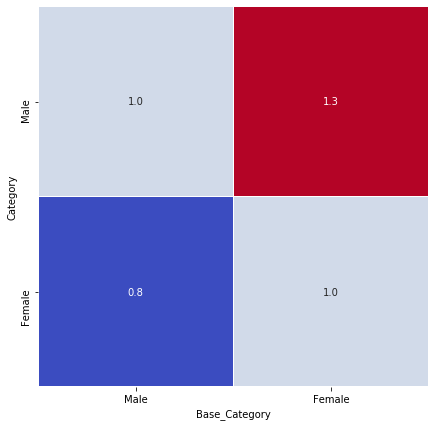

In [13]:
analysis_pkg.plot_heatmap_basecat(yearly_cat_full, 'SEX')